In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
import os

In [2]:
# Path to the JSONL file
WORDs = [
    "Acknowledgement",
    "Subdermatoglyphic",
    "tHyUiKaRbNqWeOpXcZvM",
]

index = 1
WORD = WORDs[index]

gt_data = pd.read_json(f"./images_second_prompt/{WORD}/configurations.json")

In [3]:
# remplace ./images/ with ./images_second_prompt/
gt_data["image_path"] = gt_data["image_path"].apply(
    lambda x: x.replace("./images/", "./images_second_prompt/")
)

In [4]:
# text_image_0a5a0d82-477d-47e2-a504-861c5952fe98-gemini-output.md
gt_data["gemini-output-file"] = gt_data["image_path"].apply(
    lambda x: "./" + x.replace(".png", "") + "-gemini-output.md"
)

# Read the content of each file for the gemini output and make a new column, ignoring missing files
gt_data["gemini-output-raw"] = gt_data["gemini-output-file"].apply(
    lambda x: open(x, "r").read() if os.path.exists(x) else None
)

In [5]:
# drop rows with missing gemini output
gt_data = gt_data.dropna(subset=["gemini-output-raw"])
gt_data

,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,final_width,final_height,image_path,gemini-output-file,gemini-output-raw
0,Subdermatoglyphic,fonts/Helvetica.ttf,0,4,1.4,25,0,0,10,2,512,512,./images_second_prompt/Subdermatoglyphic/text_...,././images_second_prompt/Subdermatoglyphic/tex...,"The letter ""S"" is being highlighted with a red..."
1,Subdermatoglyphic,fonts/Helvetica.ttf,0,4,1.4,50,0,0,10,2,512,512,./images_second_prompt/Subdermatoglyphic/text_...,././images_second_prompt/Subdermatoglyphic/tex...,The character highlighted with a red oval is t...
2,Subdermatoglyphic,fonts/Helvetica.ttf,0,4,1.4,100,0,0,10,2,512,512,./images_second_prompt/Subdermatoglyphic/text_...,././images_second_prompt/Subdermatoglyphic/tex...,The character highlighted with a red oval is t...
3,Subdermatoglyphic,fonts/Helvetica.ttf,0,4,1.4,200,0,0,10,2,512,512,./images_second_prompt/Subdermatoglyphic/text_...,././images_second_prompt/Subdermatoglyphic/tex...,The character highlighted with a red oval is t...
4,Subdermatoglyphic,fonts/Helvetica.ttf,0,5,1.4,25,0,0,10,2,512,512,./images_second_prompt/Subdermatoglyphic/text_...,././images_second_prompt/Subdermatoglyphic/tex...,"The character highlighted with a red oval is ""..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,Subdermatoglyphic,"fonts/OpenSans-VariableFont_wdth,wght.ttf",16,5,1.4,200,0,0,10,2,512,512,./images_second_prompt/Subdermatoglyphic/text_...,././images_second_prompt/Subdermatoglyphic/tex...,"The red oval is highlighting the letter ""c"". \n"
404,Subdermatoglyphic,"fonts/OpenSans-VariableFont_wdth,wght.ttf",16,6,1.4,25,0,0,10,2,512,512,./images_second_prompt/Subdermatoglyphic/text_...,././images_second_prompt/Subdermatoglyphic/tex...,The character highlighted with a red oval is *...
405,Subdermatoglyphic,"fonts/OpenSans-VariableFont_wdth,wght.ttf",16,6,1.4,50,0,0,10,2,512,512,./images_second_prompt/Subdermatoglyphic/text_...,././images_second_prompt/Subdermatoglyphic/tex...,The character highlighted with a red oval is t...
406,Subdermatoglyphic,"fonts/OpenSans-VariableFont_wdth,wght.ttf",16,6,1.4,100,0,0,10,2,512,512,./images_second_prompt/Subdermatoglyphic/text_...,././images_second_prompt/Subdermatoglyphic/tex...,"The letter highlighted with a red oval is ""**C..."


In [6]:
def extract_marked_text(text):
    # First try to extract text between **
    parts = text.split("**")
    if len(parts) > 1:
        return parts[1].lower().replace('"', "")
    else:
        # If not found, try to extract text between "
        parts = text.split('"')
        if len(parts) > 1:
            return parts[1].lower()
        else:
            # Check for special characters or symbols
            special_chars = ["©"]
            for char in special_chars:
                if char in text:
                    return char
            # Handle no red oval case
            if "no red oval" in text:
                return "no_red_oval"
            # Default case if no marker found
            return "marker_not_found"


gt_data["predicted"] = gt_data["gemini-output-raw"].apply(extract_marked_text)

In [7]:
gt_data["predicted"].value_counts()

predicted
o              46
y              29
e              29
h              25
a              24
u              24
b              24
d              24
m              24
p              24
i              23
s              23
g              23
c              19
l              17
r              16
t               9
©               4
no_red_oval     1
Name: count, dtype: int64

In [8]:
cleaned_data = gt_data.copy()

In [9]:
cleaned_data["gt"] = cleaned_data.apply(
    lambda row: row["word"][row["circle_index"]].lower(), axis=1
)

In [10]:
cleaned_data.head()

,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,final_width,final_height,image_path,gemini-output-file,gemini-output-raw,predicted,gt
0,Subdermatoglyphic,fonts/Helvetica.ttf,0,4,1.4,25,0,0,10,2,512,512,./images_second_prompt/Subdermatoglyphic/text_...,././images_second_prompt/Subdermatoglyphic/tex...,"The letter ""S"" is being highlighted with a red...",s,s
1,Subdermatoglyphic,fonts/Helvetica.ttf,0,4,1.4,50,0,0,10,2,512,512,./images_second_prompt/Subdermatoglyphic/text_...,././images_second_prompt/Subdermatoglyphic/tex...,The character highlighted with a red oval is t...,s,s
2,Subdermatoglyphic,fonts/Helvetica.ttf,0,4,1.4,100,0,0,10,2,512,512,./images_second_prompt/Subdermatoglyphic/text_...,././images_second_prompt/Subdermatoglyphic/tex...,The character highlighted with a red oval is t...,s,s
3,Subdermatoglyphic,fonts/Helvetica.ttf,0,4,1.4,200,0,0,10,2,512,512,./images_second_prompt/Subdermatoglyphic/text_...,././images_second_prompt/Subdermatoglyphic/tex...,The character highlighted with a red oval is t...,s,s
4,Subdermatoglyphic,fonts/Helvetica.ttf,0,5,1.4,25,0,0,10,2,512,512,./images_second_prompt/Subdermatoglyphic/text_...,././images_second_prompt/Subdermatoglyphic/tex...,"The character highlighted with a red oval is ""...",s,s


In [11]:
cleaned_data["is_prediction_correct"] = cleaned_data["gt"] == cleaned_data["predicted"]
# get accuracy
accuracy = cleaned_data["is_prediction_correct"].mean()
print(f"Overall Accuracy: {accuracy * 100:.2f}%")

Overall Accuracy: 90.69%


In [12]:
len(cleaned_data)

408

In [13]:
errors = cleaned_data[cleaned_data["is_prediction_correct"] == False]
common_errors = (
    errors.groupby(["predicted", "gt"])
    .size()
    .reset_index(name="count")
    .sort_values(by="count", ascending=False)
)
print(common_errors.head(10))

     predicted gt  count
7            o  t     15
0            e  r      5
8            y  l      5
9            ©  c      4
6            o  r      3
5            o  l      2
1            h  i      1
2  no_red_oval  s      1
3            o  c      1
4            o  g      1


/var/folders/y1/b5wjnkp96_b7cvzncx0zsry40000gn/T/ipykernel_98602/384443575.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/y1/b5wjnkp96_b7cvzncx0zsry40000gn/T/ipykernel_98602/384443575.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/y1/b5wjnkp96_b7cvzncx0zsry40000gn/T/ipykernel_98602/384443575.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(list(WORD))
/var/folders/y1/b5wjnkp96_b7cvzncx0zsry40000gn/T/ipykernel_98602/384443575.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. As

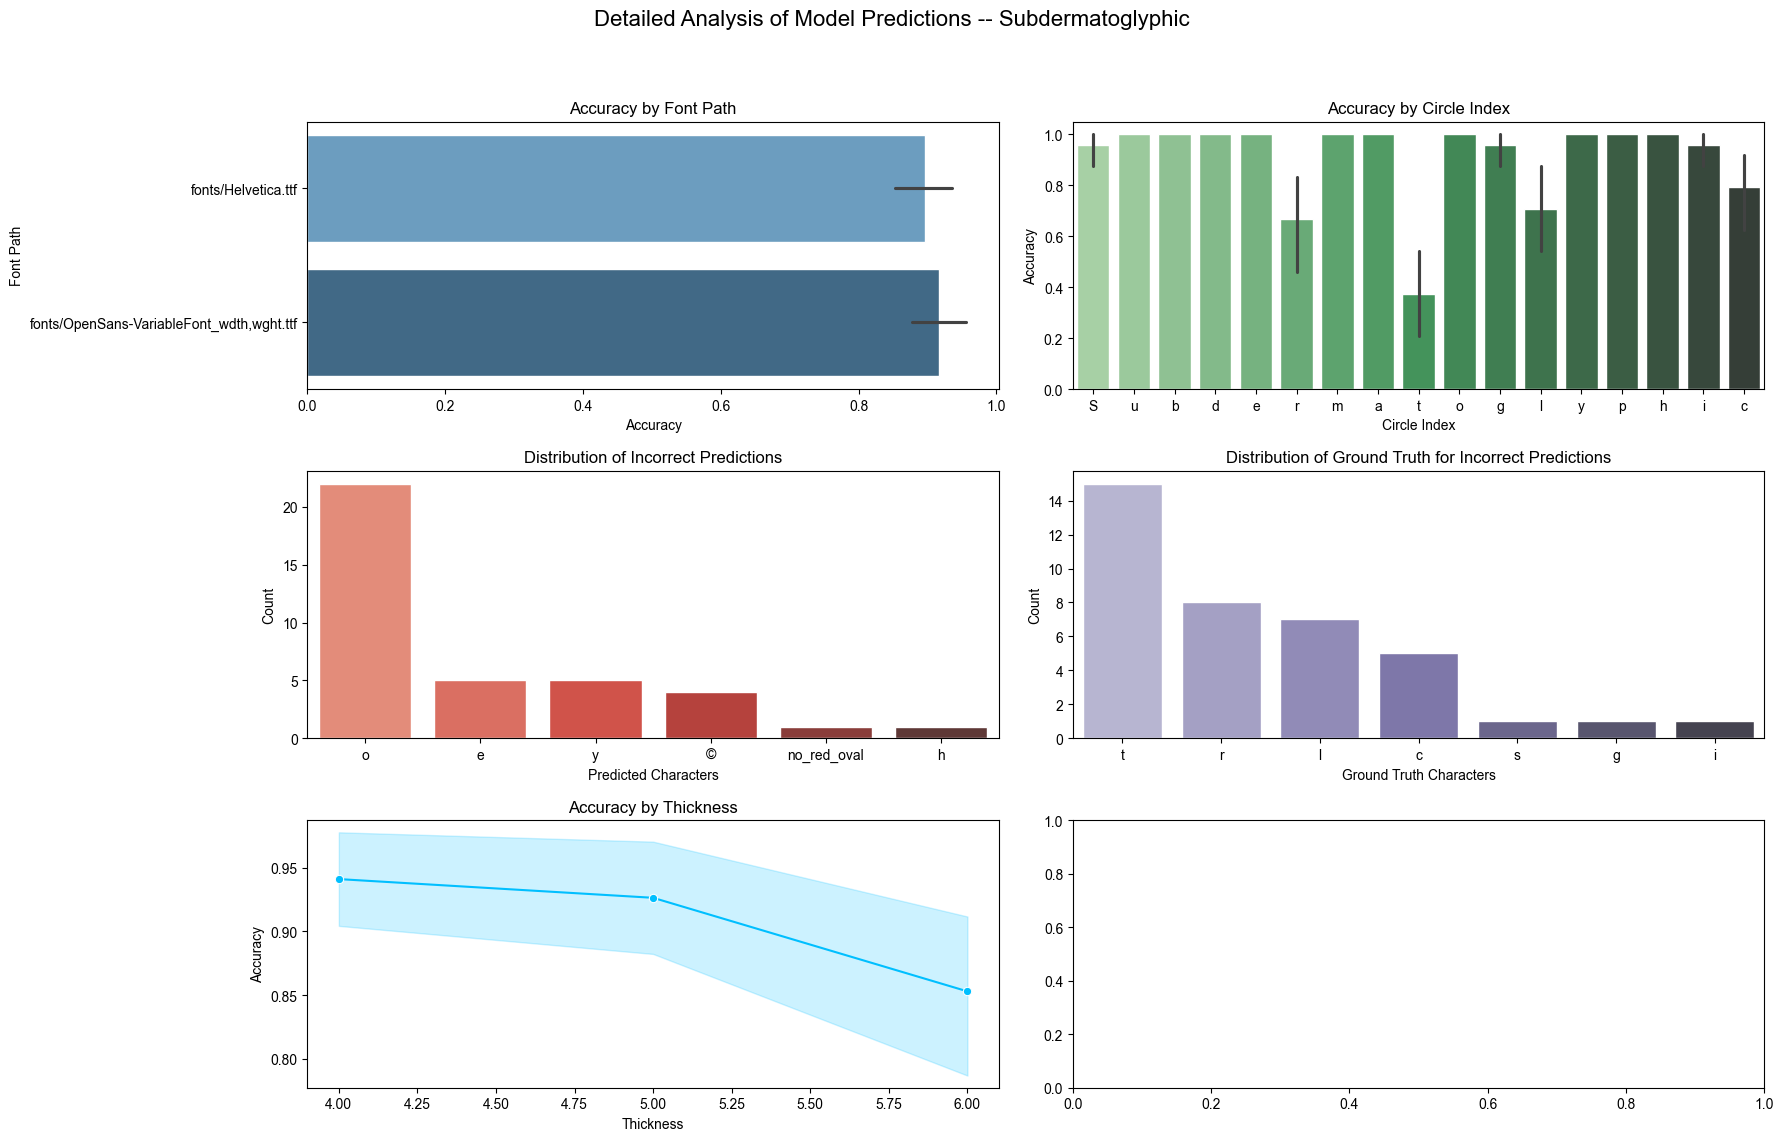

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure with a more professional color palette and layout
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
fig.suptitle(f"Detailed Analysis of Model Predictions -- {WORD}", fontsize=16)

# Customize the color palette
sns.set(style="whitegrid", palette="muted")

# Plot Accuracy by Font Path
sns.barplot(
    ax=axes[0, 0],
    x="is_prediction_correct",
    y="font_path",
    data=cleaned_data,
    estimator=lambda x: x.mean(),
    palette="Blues_d",
)
axes[0, 0].set_title("Accuracy by Font Path")
axes[0, 0].set_xlabel("Accuracy")
axes[0, 0].set_ylabel("Font Path")

# Plot Accuracy by Circle Index
sns.barplot(
    ax=axes[0, 1],
    x="circle_index",
    y="is_prediction_correct",
    data=cleaned_data,
    estimator=lambda x: x.mean(),
    palette="Greens_d",
)
axes[0, 1].set_title("Accuracy by Circle Index")
axes[0, 1].set_xlabel("Circle Index")
axes[0, 1].set_ylabel("Accuracy")
# Set x-axis labels to characters from the word
axes[0, 1].set_xticklabels(list(WORD))


# Plot Distribution of Incorrect Predictions
sns.countplot(
    ax=axes[1, 0],
    x="predicted",
    data=errors,
    order=errors["predicted"].value_counts().index,
    palette="Reds_d",
)
axes[1, 0].set_title("Distribution of Incorrect Predictions")
axes[1, 0].set_xlabel("Predicted Characters")
axes[1, 0].set_ylabel("Count")

# Plot Distribution of Ground Truth for Incorrect Predictions
sns.countplot(
    ax=axes[1, 1],
    x="gt",
    data=errors,
    order=errors["gt"].value_counts().index,
    palette="Purples_d",
)
axes[1, 1].set_title("Distribution of Ground Truth for Incorrect Predictions")
axes[1, 1].set_xlabel("Ground Truth Characters")
axes[1, 1].set_ylabel("Count")

# Plot Accuracy by Thickness
sns.lineplot(
    ax=axes[2, 0],
    x="thickness",
    y="is_prediction_correct",
    data=cleaned_data,
    estimator=lambda x: x.mean(),
    marker="o",
    color="deepskyblue",
)
axes[2, 0].set_title("Accuracy by Thickness")
axes[2, 0].set_xlabel("Thickness")
axes[2, 0].set_ylabel("Accuracy")


plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust subplots to fit into figure area.
plt.show()

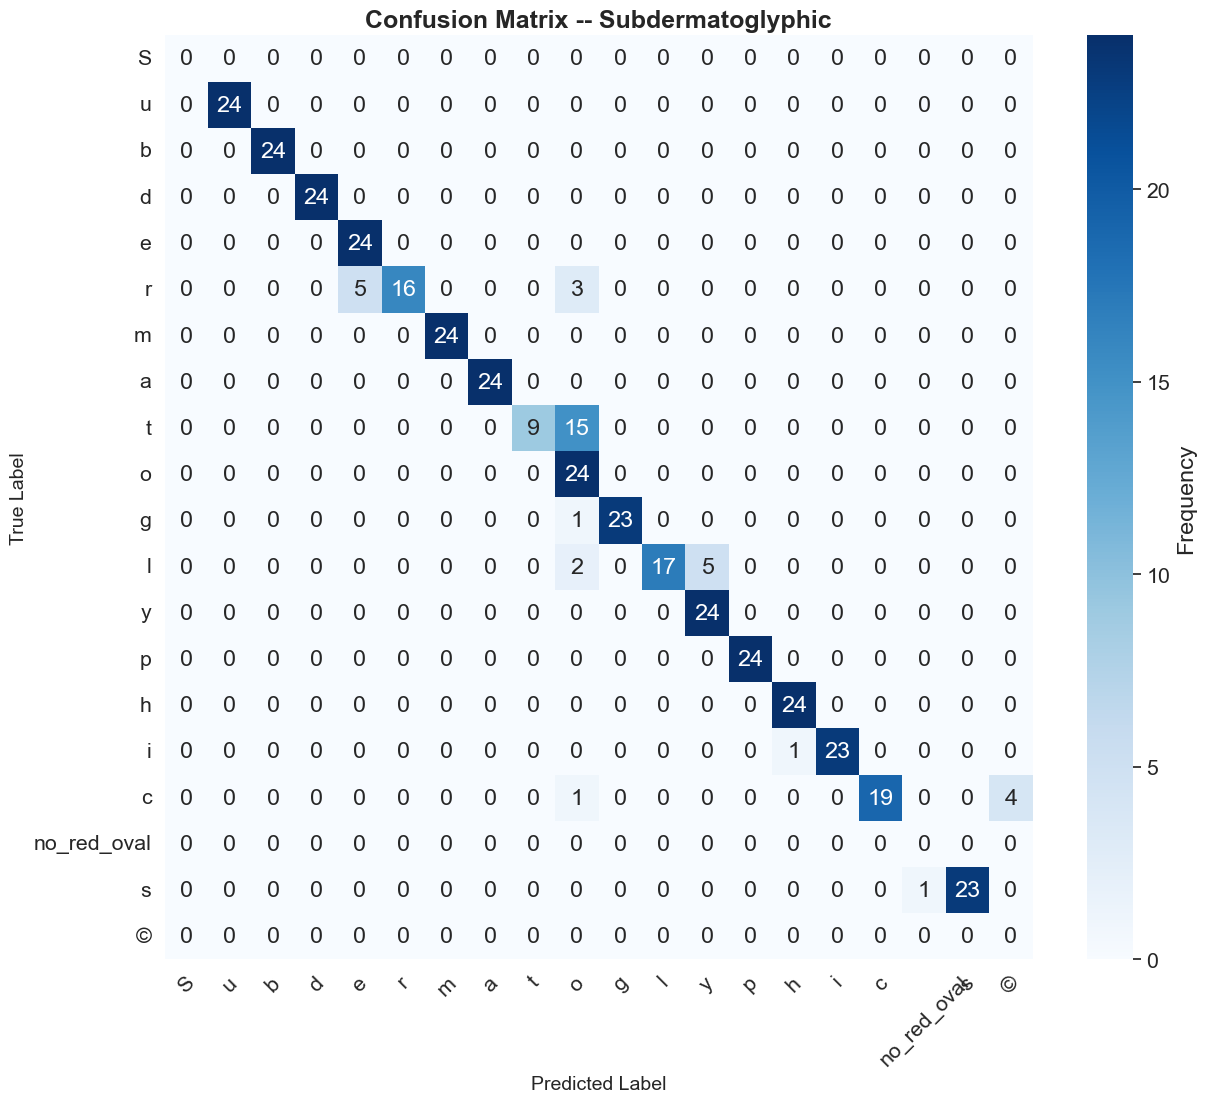

In [15]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Extract ground truth and predictions
ground_truth = cleaned_data["gt"]
predictions = cleaned_data["predicted"]

# Define the order of labels based on the word "Acknowledgement" and any extra characters
desired_order = list(WORD)  # Ensure it's in lowercase if your data is in lowercase
all_labels = np.unique(np.concatenate((ground_truth, predictions)))
extra_labels = [label for label in all_labels if label not in desired_order]
final_labels = desired_order + extra_labels

# Create the confusion matrix with the specified label order
conf_matrix = confusion_matrix(ground_truth, predictions, labels=final_labels)

# Plot the confusion matrix with a more professional appearance
plt.figure(figsize=(14, 12))
sns.set(font_scale=1.4)  # Increase font size for readability
heatmap = sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=final_labels,
    yticklabels=final_labels,
    cbar_kws={"label": "Frequency"},
)
plt.title(f"Confusion Matrix -- {WORD}", fontsize=18, fontweight="bold")
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Export

In [3]:
def extract_marked_text(text):
    # First try to extract text between **
    parts = text.split("**")
    if len(parts) > 1:
        return parts[1].lower().replace('"', "")
    else:
        # If not found, try to extract text between "
        parts = text.split('"')
        if len(parts) > 1:
            return parts[1].lower()
        else:
            # Check for special characters or symbols
            special_chars = ["©"]
            for char in special_chars:
                if char in text:
                    return char
            # Handle no red oval case
            if "no red oval" in text:
                return "no_red_oval"
            # Default case if no marker found
            return "marker_not_found"

In [4]:
import pandas as pd
import os

# Define the words
WORDs = [
    "Acknowledgement",
    "Subdermatoglyphic",
    "tHyUiKaRbNqWeOpXcZvM",
]

# Initialize an empty list to store DataFrames
all_data_frames = []

# Loop through each word
for WORD in WORDs:
    gt_data = pd.read_json(f"./images_second_prompt/{WORD}/configurations.json")

    # remplace ./images/ with ./images_second_prompt/
    gt_data["image_path"] = gt_data["image_path"].apply(
        lambda x: x.replace("./images/", "./images_second_prompt/")
    )

    # Generate the output file paths and read the content
    gt_data["model-output-file"] = gt_data["image_path"].apply(
        lambda x: "./" + x.replace(".png", "") + "-gemini-output.md"
    )
    gt_data["model-output-raw"] = gt_data["model-output-file"].apply(
        lambda x: open(x, "r").read() if os.path.exists(x) else None
    )

    # Drop rows with missing gemini output
    gt_data = gt_data.dropna(subset=["model-output-raw"])

    gt_data["predicted"] = gt_data["model-output-raw"].apply(extract_marked_text)

    print(gt_data["predicted"].value_counts())

    # Prepare the cleaned data
    cleaned_data = gt_data.copy()
    cleaned_data["gt"] = cleaned_data.apply(
        lambda row: row["word"][row["circle_index"]].lower(), axis=1
    )
    cleaned_data["is_prediction_correct"] = (
        cleaned_data["gt"] == cleaned_data["predicted"]
    )
    cleaned_data["word_label"] = WORD  # Add a column to identify the word

    # Append to the list
    all_data_frames.append(cleaned_data)

# Concatenate all DataFrames into one
final_data_frame = pd.concat(all_data_frames, ignore_index=True)

predicted
e    70
n    48
w    26
a    24
k    24
o    24
d    24
g    24
m    24
t    24
l    22
c    16
©     8
@     2
Name: count, dtype: int64
predicted
o              46
y              29
e              29
h              25
a              24
u              24
b              24
d              24
m              24
p              24
i              23
s              23
g              23
c              19
l              17
r              16
t               9
©               4
no_red_oval     1
Name: count, dtype: int64
predicted
a    44
v    35
b    30
o    29
y    26
c    26
p    26
i    25
t    24
w    24
e    24
m    24
n    24
u    23
q    23
h    22
r    18
x    15
z    13
@     2
k     2
g     1
Name: count, dtype: int64


In [5]:
final_data_frame["Model"] = ["Gemini-1.5-Pro"] * len(final_data_frame)

In [6]:
final_data_frame.to_pickle("./data/gemini-1.5-pro-2.pkl")

In [7]:
final_data_frame

,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,final_width,final_height,image_path,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model
0,Acknowledgement,fonts/Helvetica.ttf,0,4,1.4,25,0,0,10,2,512,512,./images_second_prompt/Acknowledgement/text_im...,././images_second_prompt/Acknowledgement/text_...,The character highlighted with a red oval is t...,a,a,True,Acknowledgement,Gemini-1.5-Pro
1,Acknowledgement,fonts/Helvetica.ttf,0,4,1.4,50,0,0,10,2,512,512,./images_second_prompt/Acknowledgement/text_im...,././images_second_prompt/Acknowledgement/text_...,The character highlighted with a red oval is t...,a,a,True,Acknowledgement,Gemini-1.5-Pro
2,Acknowledgement,fonts/Helvetica.ttf,0,4,1.4,100,0,0,10,2,512,512,./images_second_prompt/Acknowledgement/text_im...,././images_second_prompt/Acknowledgement/text_...,The character being highlighted is the capital...,a,a,True,Acknowledgement,Gemini-1.5-Pro
3,Acknowledgement,fonts/Helvetica.ttf,0,4,1.4,200,0,0,10,2,512,512,./images_second_prompt/Acknowledgement/text_im...,././images_second_prompt/Acknowledgement/text_...,The character highlighted with a red oval is t...,a,a,True,Acknowledgement,Gemini-1.5-Pro
4,Acknowledgement,fonts/Helvetica.ttf,0,5,1.4,25,0,0,10,2,512,512,./images_second_prompt/Acknowledgement/text_im...,././images_second_prompt/Acknowledgement/text_...,The character highlighted with a red oval is t...,a,a,True,Acknowledgement,Gemini-1.5-Pro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",19,5,1.4,200,0,0,10,2,512,512,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,././images_second_prompt/tHyUiKaRbNqWeOpXcZvM/...,The character highlighted with a red oval is t...,m,m,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro
1244,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",19,6,1.4,25,0,0,10,2,512,512,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,././images_second_prompt/tHyUiKaRbNqWeOpXcZvM/...,The character highlighted in the red oval is *...,m,m,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro
1245,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",19,6,1.4,50,0,0,10,2,512,512,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,././images_second_prompt/tHyUiKaRbNqWeOpXcZvM/...,"The character highlighted with a red oval is ""...",m,m,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro
1246,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",19,6,1.4,100,0,0,10,2,512,512,./images_second_prompt/tHyUiKaRbNqWeOpXcZvM/te...,././images_second_prompt/tHyUiKaRbNqWeOpXcZvM/...,"The character highlighted with a red oval is ""...",m,m,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro
